In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, ttest_rel, chi2, chi2_contingency
from scipy import stats
import random

In [30]:
data = pd.read_csv("D:\WidiPythonEnv\Machine-Learning/5210411135\data\Kredit_ku.csv")
data.head()

,Durasi,Riwayat_kredit,Tujuan,Jum_kredit,Savings,Masa_kerja,Pekerjaan,Jum_tanggungan,creditScore
0,6,A34,A43,1169,A65,A75,A173,1,1
1,48,A32,A43,5951,A61,A73,A173,1,2
2,12,A34,A46,2096,A61,A74,A172,2,1
3,42,A32,A42,7882,A61,A74,A173,2,1
4,24,A33,A40,4870,A61,A73,A173,2,2


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Durasi          149 non-null    int64 
 1   Riwayat_kredit  149 non-null    object
 2   Tujuan          149 non-null    object
 3   Jum_kredit      149 non-null    int64 
 4   Savings         149 non-null    object
 5   Masa_kerja      149 non-null    object
 6   Pekerjaan       149 non-null    object
 7   Jum_tanggungan  149 non-null    int64 
 8   creditScore     149 non-null    int64 
dtypes: int64(4), object(5)
memory usage: 10.6+ KB


In [32]:
data.isnull().sum()

Durasi            0
Riwayat_kredit    0
Tujuan            0
Jum_kredit        0
Savings           0
Masa_kerja        0
Pekerjaan         0
Jum_tanggungan    0
creditScore       0
dtype: int64

In [33]:
cscore_df = data[['creditScore']]
cscore_df.value_counts()

creditScore
1              112
2               37
Name: count, dtype: int64

In [34]:
df_attr = data.drop(cscore_df, axis=1)
print(df_attr.shape)
print(df_attr.isnull().sum())

(149, 8)
Durasi            0
Riwayat_kredit    0
Tujuan            0
Jum_kredit        0
Savings           0
Masa_kerja        0
Pekerjaan         0
Jum_tanggungan    0
dtype: int64


In [35]:
kategori_df = data.select_dtypes(include=['object'])
kategori_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Riwayat_kredit  149 non-null    object
 1   Tujuan          149 non-null    object
 2   Savings         149 non-null    object
 3   Masa_kerja      149 non-null    object
 4   Pekerjaan       149 non-null    object
dtypes: object(5)
memory usage: 5.9+ KB


In [36]:
numeric_df = data.select_dtypes(include=['int64'])
numeric_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Durasi          149 non-null    int64
 1   Jum_kredit      149 non-null    int64
 2   Jum_tanggungan  149 non-null    int64
 3   creditScore     149 non-null    int64
dtypes: int64(4)
memory usage: 4.8 KB


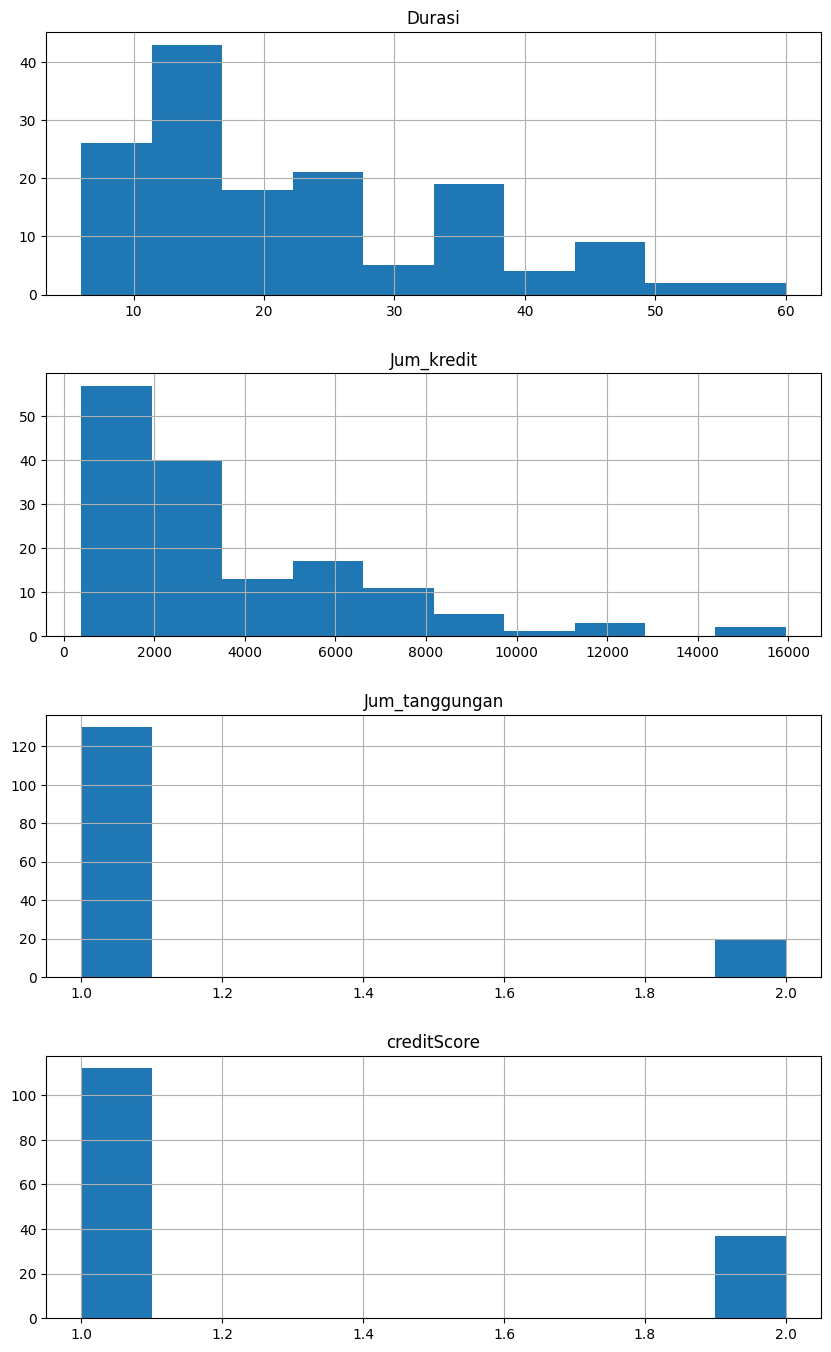

In [37]:
num_col = numeric_df.columns.values
data.hist(column=num_col, figsize=(10,30), layout=(7,1))
plt.show()

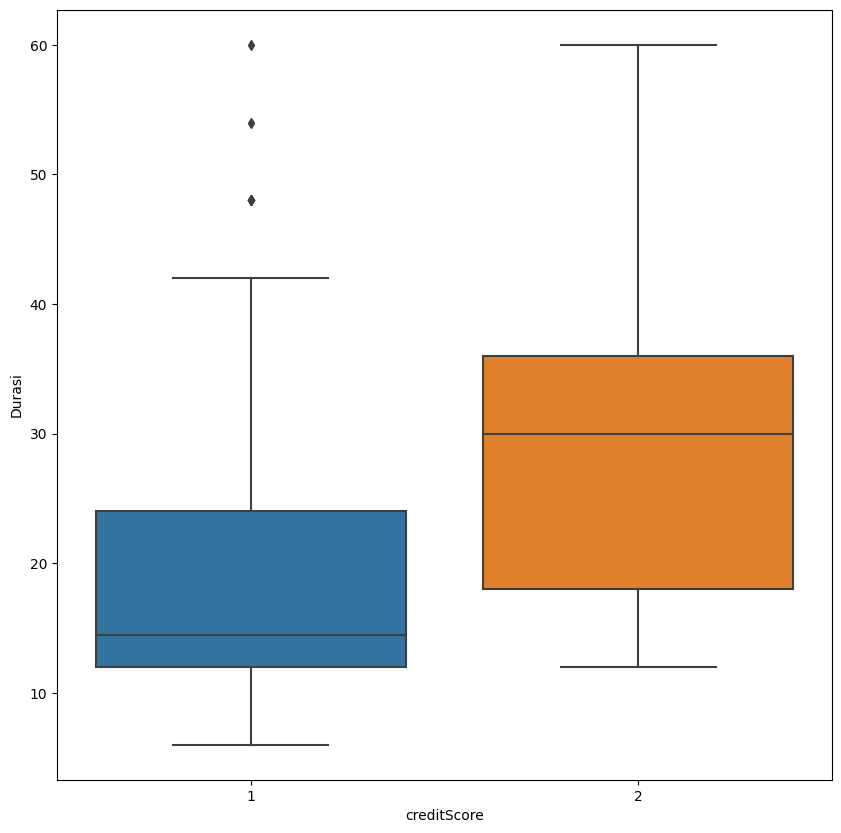

In [38]:
fig = plt.figure(figsize=(10,10))
sns.boxplot(x='creditScore', y='Durasi', data=data)
plt.show()

In [39]:
data[['creditScore', 'Durasi']].groupby('creditScore', as_index=False).mean().sort_values(by='Durasi', ascending=False)


,creditScore,Durasi
1,2,29.918919
0,1,19.142857


In [40]:
data = data[(np.abs(stats.zscore(data['Durasi'])) < 3)]

inc_1 = data[data['creditScore'] == 1]['Durasi'].tolist()
inc_0 = data[data['creditScore'] == 2]['Durasi'].tolist()

inc_0 = random.sample(inc_0, 10)
inc_1 = random.sample(inc_1, 10)

ttest, pval = ttest_ind(inc_1, inc_0, equal_var=False)

print(f'ttest\t: {ttest}\npval\t: {pval}')

if pval < 0.05:
    print('Ho Ditolak')
else:
    print('Ho Diterima')

ttest	: -2.6776397099311016
pval	: 0.017365308323956476
Ho Ditolak


In [41]:
data = data[(np.abs(stats.zscore(data['Jum_kredit'])) < 3)]

inc_1 = data[data['creditScore'] == 1]['Jum_kredit'].tolist()
inc_0 = data[data['creditScore'] == 2]['Jum_kredit'].tolist()

inc_0 = random.sample(inc_0, 10)
inc_1 = random.sample(inc_1, 10)

ttest, pval = ttest_ind(inc_1, inc_0, equal_var=False)

print(f'ttest\t: {ttest}\npval\t: {pval}')

if pval < 0.05:
    print('Ho Ditolak')
else:
    print('Ho Diterima')

ttest	: -0.29831439916828445
pval	: 0.7693167196354411
Ho Diterima


In [42]:
data = data[(np.abs(stats.zscore(data['Jum_tanggungan'])) < 3)]

inc_1 = data[data['creditScore'] == 1]['Jum_tanggungan'].tolist()
inc_0 = data[data['creditScore'] == 2]['Jum_tanggungan'].tolist()

inc_0 = random.sample(inc_0, 10)
inc_1 = random.sample(inc_1, 10)

ttest, pval = ttest_ind(inc_1, inc_0, equal_var=False)

print(f'ttest\t: {ttest}\npval\t: {pval}')

if pval < 0.05:
    print('Ho Ditolak')
else:
    print('Ho Diterima')

ttest	: nan
pval	: nan
Ho Diterima


C:\Users\Asus Vivobook\AppData\Local\Temp\ipykernel_4276\2280867638.py:9: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  ttest, pval = ttest_ind(inc_1, inc_0, equal_var=False)


In [43]:
def bar_chart(feature):
    acc = data[data['creditScore']==1][feature].value_counts()
    rej = data[data['creditScore']==2][feature].value_counts()

    df1 = pd.DataFrame([acc, rej])
    df1.index = ['Accepted', 'Rejected']
    df1.plot(kind='bar', stacked=True, fig=(18,6), title=feature)

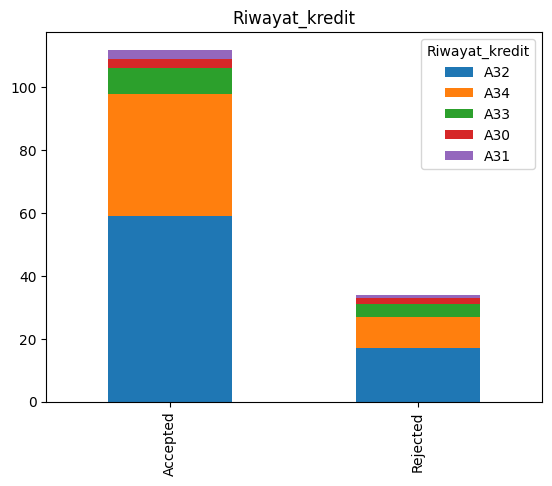

In [44]:
bar_chart('Riwayat_kredit')

In [45]:
crosstab = pd.crosstab(data['Riwayat_kredit'], data['creditScore'], margins=False)
crosstabb

NameError: name 'crosstabb' is not defined

In [ ]:
stat, p, dof, expected = chi2_contingency(crosstab)
print(f'dof\t\t: {dof}\np_value\t\t: {p}\nexpected\t:\n{expected}')

dof		: 4
p_value		: 0.7853458416600356
expected	:
[[ 3.83561644  1.16438356]
 [ 3.06849315  0.93150685]
 [58.30136986 17.69863014]
 [ 9.20547945  2.79452055]
 [37.5890411  11.4109589 ]]


In [ ]:
prob = 0.99
critical = chi2.ppf(prob, dof)
print(f'probabilitas\t: {prob}\ncritical\t: {critical}\nstat\t\t: {stat}')

if abs(stat) >= critical:
    print('Dependent (Tolak H0)')
else:
    print('Independent (Terima H0)')

probabilitas	: 0.99
critical	: 13.276704135987622
stat		: 1.7295348966654334
Independent (Terima H0)


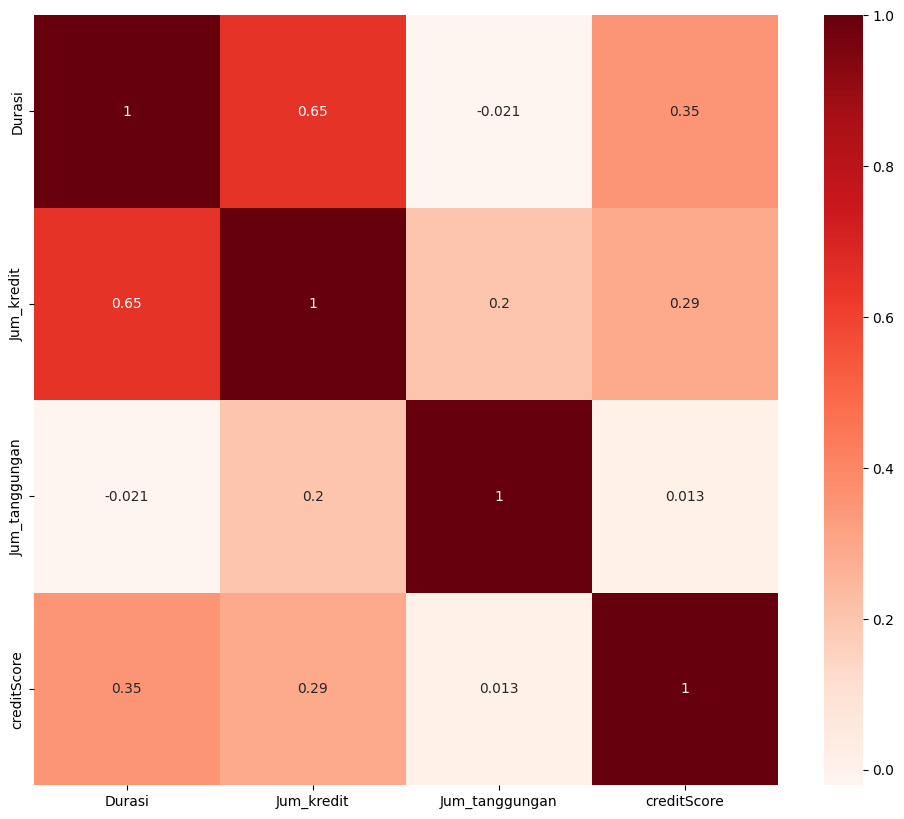

Durasi         0.353000
Jum_kredit     0.290965
creditScore    1.000000
Name: creditScore, dtype: float64

In [54]:
plt.figure(figsize=(12,10))
cor = numeric_df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

cor_target = abs(cor['creditScore'])
relevant_features = cor_target[cor_target > 0.1]
relevant_features